# K-Nearest Neighbors (KNN)

Author: Jacob McCabe

## Overview

This notebook will take a look at K-Nearest Neighbors algorithm. The main ideas covered will include:

1. Explanation the algorithm
2. Usage for real problems
3. Example using `KNeighborsClassifier` from `scikit-learn`

## What is K-Nearest Neighbors?

The K-Nearest Neighbors algorithm is a non-parametric, supervised learning classifier. It assumes there is proximity of points to make predictions about the grouping of individual data points, i.e. similar points will be located close to each other. In the algorithm, $k > 0$ represents the number of neighbors to use for a point. 

To visualize the process, consider a sphere centered on a point $x$ that we want to label/classify. That sphere contains $k$ points closest to $x$ (typically Euclidean distance) that have a defined label. To label our point $x$, it will use the most often represented class in the $k$ points around it. For regression problems, the mean of the $k$ nearest neighbors is used.

## Usage for real problems

KNN is useful in a variety of situations, typically for classification problems.
- Preprocessing data to fill missing values
- Automatic recommendations
- Pattern recognition

### Pros

While there are not a ton of advantages to this algorithm, it is easy to implement. This also makes it very common for teaching to beginners. Another advantage is that unlike many other models, there is only two hyperparameters: $k$ and the distance metric. This means that fine-tuning can be much easier since the search grid is typically more narrow than other ML algorithms.  

### Cons

KNN is a 'lazy algorithm'. This means that it has to hold all data points in memory and is inefficient for large datasets. As many datasets continue to grow larger and larger, it becomes increasingly more difficult to run KNN efficiently. There are ways to help combat this issue, but they won't be discussed here. It also often is a victim of dimensionality, and so with more features it often is more likely to misclassify points.

## Resources

- [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)
- [IBM: K-Nearest Neighbors Algorithm](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.)
- [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#The_weighted_nearest_neighbour_classifier)
- [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

## Example using `KNeighborsClassifier` from `scikit-learn` 

In [34]:
import numpy as np
import pandas as pd
import math
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

For a simple example, we will use the Wine dataset available in `sklearn.datasets`. There are 13 continuous features and 3 target classes.

In [55]:
features, target = load_wine(return_X_y=True, as_frame=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

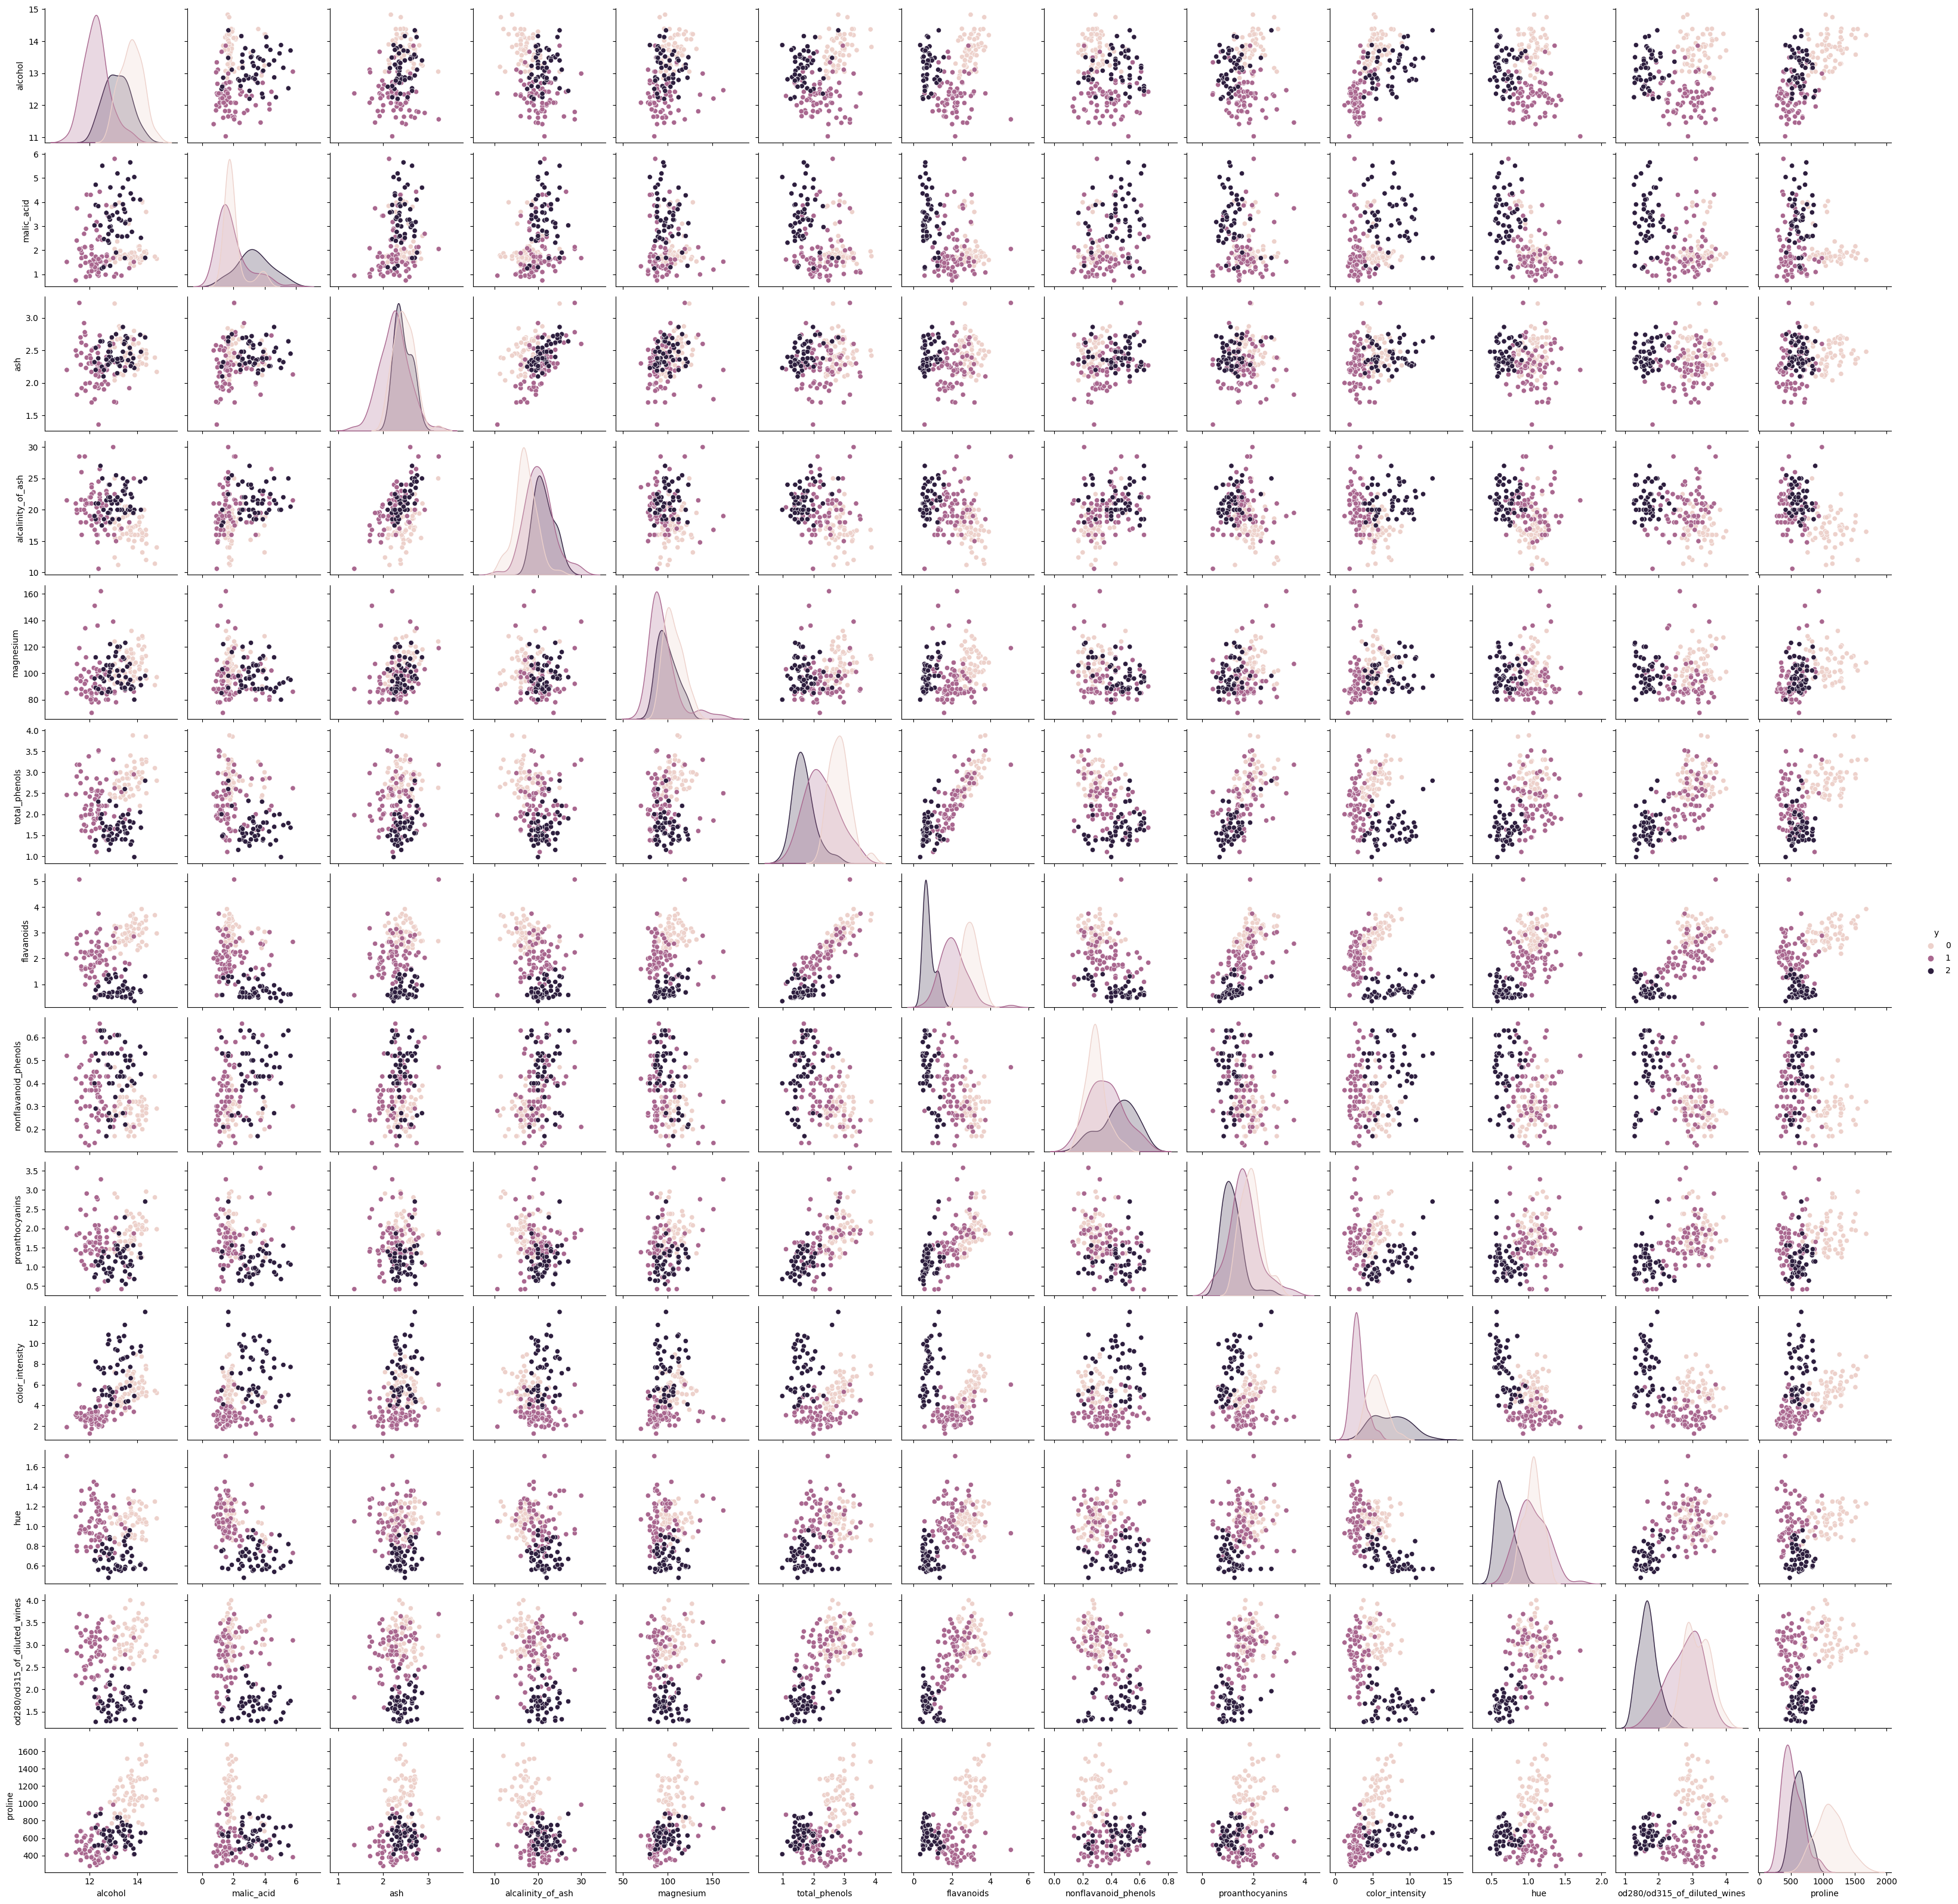

In [41]:
data = features.copy()
data['y'] = target.copy()
p=sns.pairplot(data, hue = 'y')

### Training `KNeighborsClassifier`

Once we split our train and test data, we want to determine our optimal $k$.

Text(0.5, 0, 'K Value')

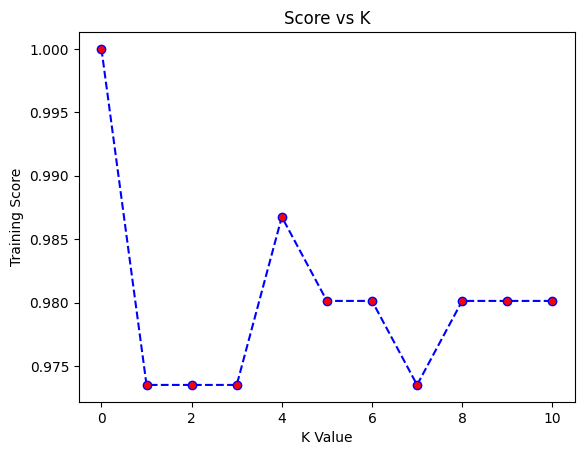

In [96]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15)

error = []
max_k = int(math.sqrt(X_train.shape[0]))
for k in range(1, max_k):
    steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))]
    knn = Pipeline(steps)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    error.append(train_score)
    
plt.plot(error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title("Score vs K")
plt.ylabel("Training Score")
plt.xlabel("K Value")



While the graph will change every time, it looks like $k=9$ will be a good candidate since the accuracy seems to drop off for values greater than 9. To tune the model further, we could run the model multiple times at for each $k$ and base our decision off the mean accuracy. For now, let's see how we did on the test set.

In [97]:
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=8))]
knn = Pipeline(steps)
knn.fit(X_train, y_train)
train_preds = knn.predict(X_train)
metrics.confusion_matrix(y_train, train_preds)


array([[52,  0,  0],
       [ 3, 53,  1],
       [ 0,  0, 42]], dtype=int64)

In [98]:
test_preds = knn.predict(X_test)
metrics.confusion_matrix(y_test, test_preds)

array([[ 7,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  6]], dtype=int64)